In [43]:
from sklearn.utils.multiclass import unique_labels
from typing import Dict
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, \
    balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [44]:
mushrooms = pd.read_csv('../data/mushrooms.csv')

In [45]:
mushrooms.shape

(8124, 23)

In [46]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [47]:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [48]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [49]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [50]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [51]:
le = LabelEncoder()
for item in mushrooms:
    mushrooms[item] = le.fit_transform(mushrooms[item])

In [52]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


c:\users\administrator\pycharmprojects\rk_tmm\venv\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\administrator\pycharmprojects\rk_tmm\venv\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


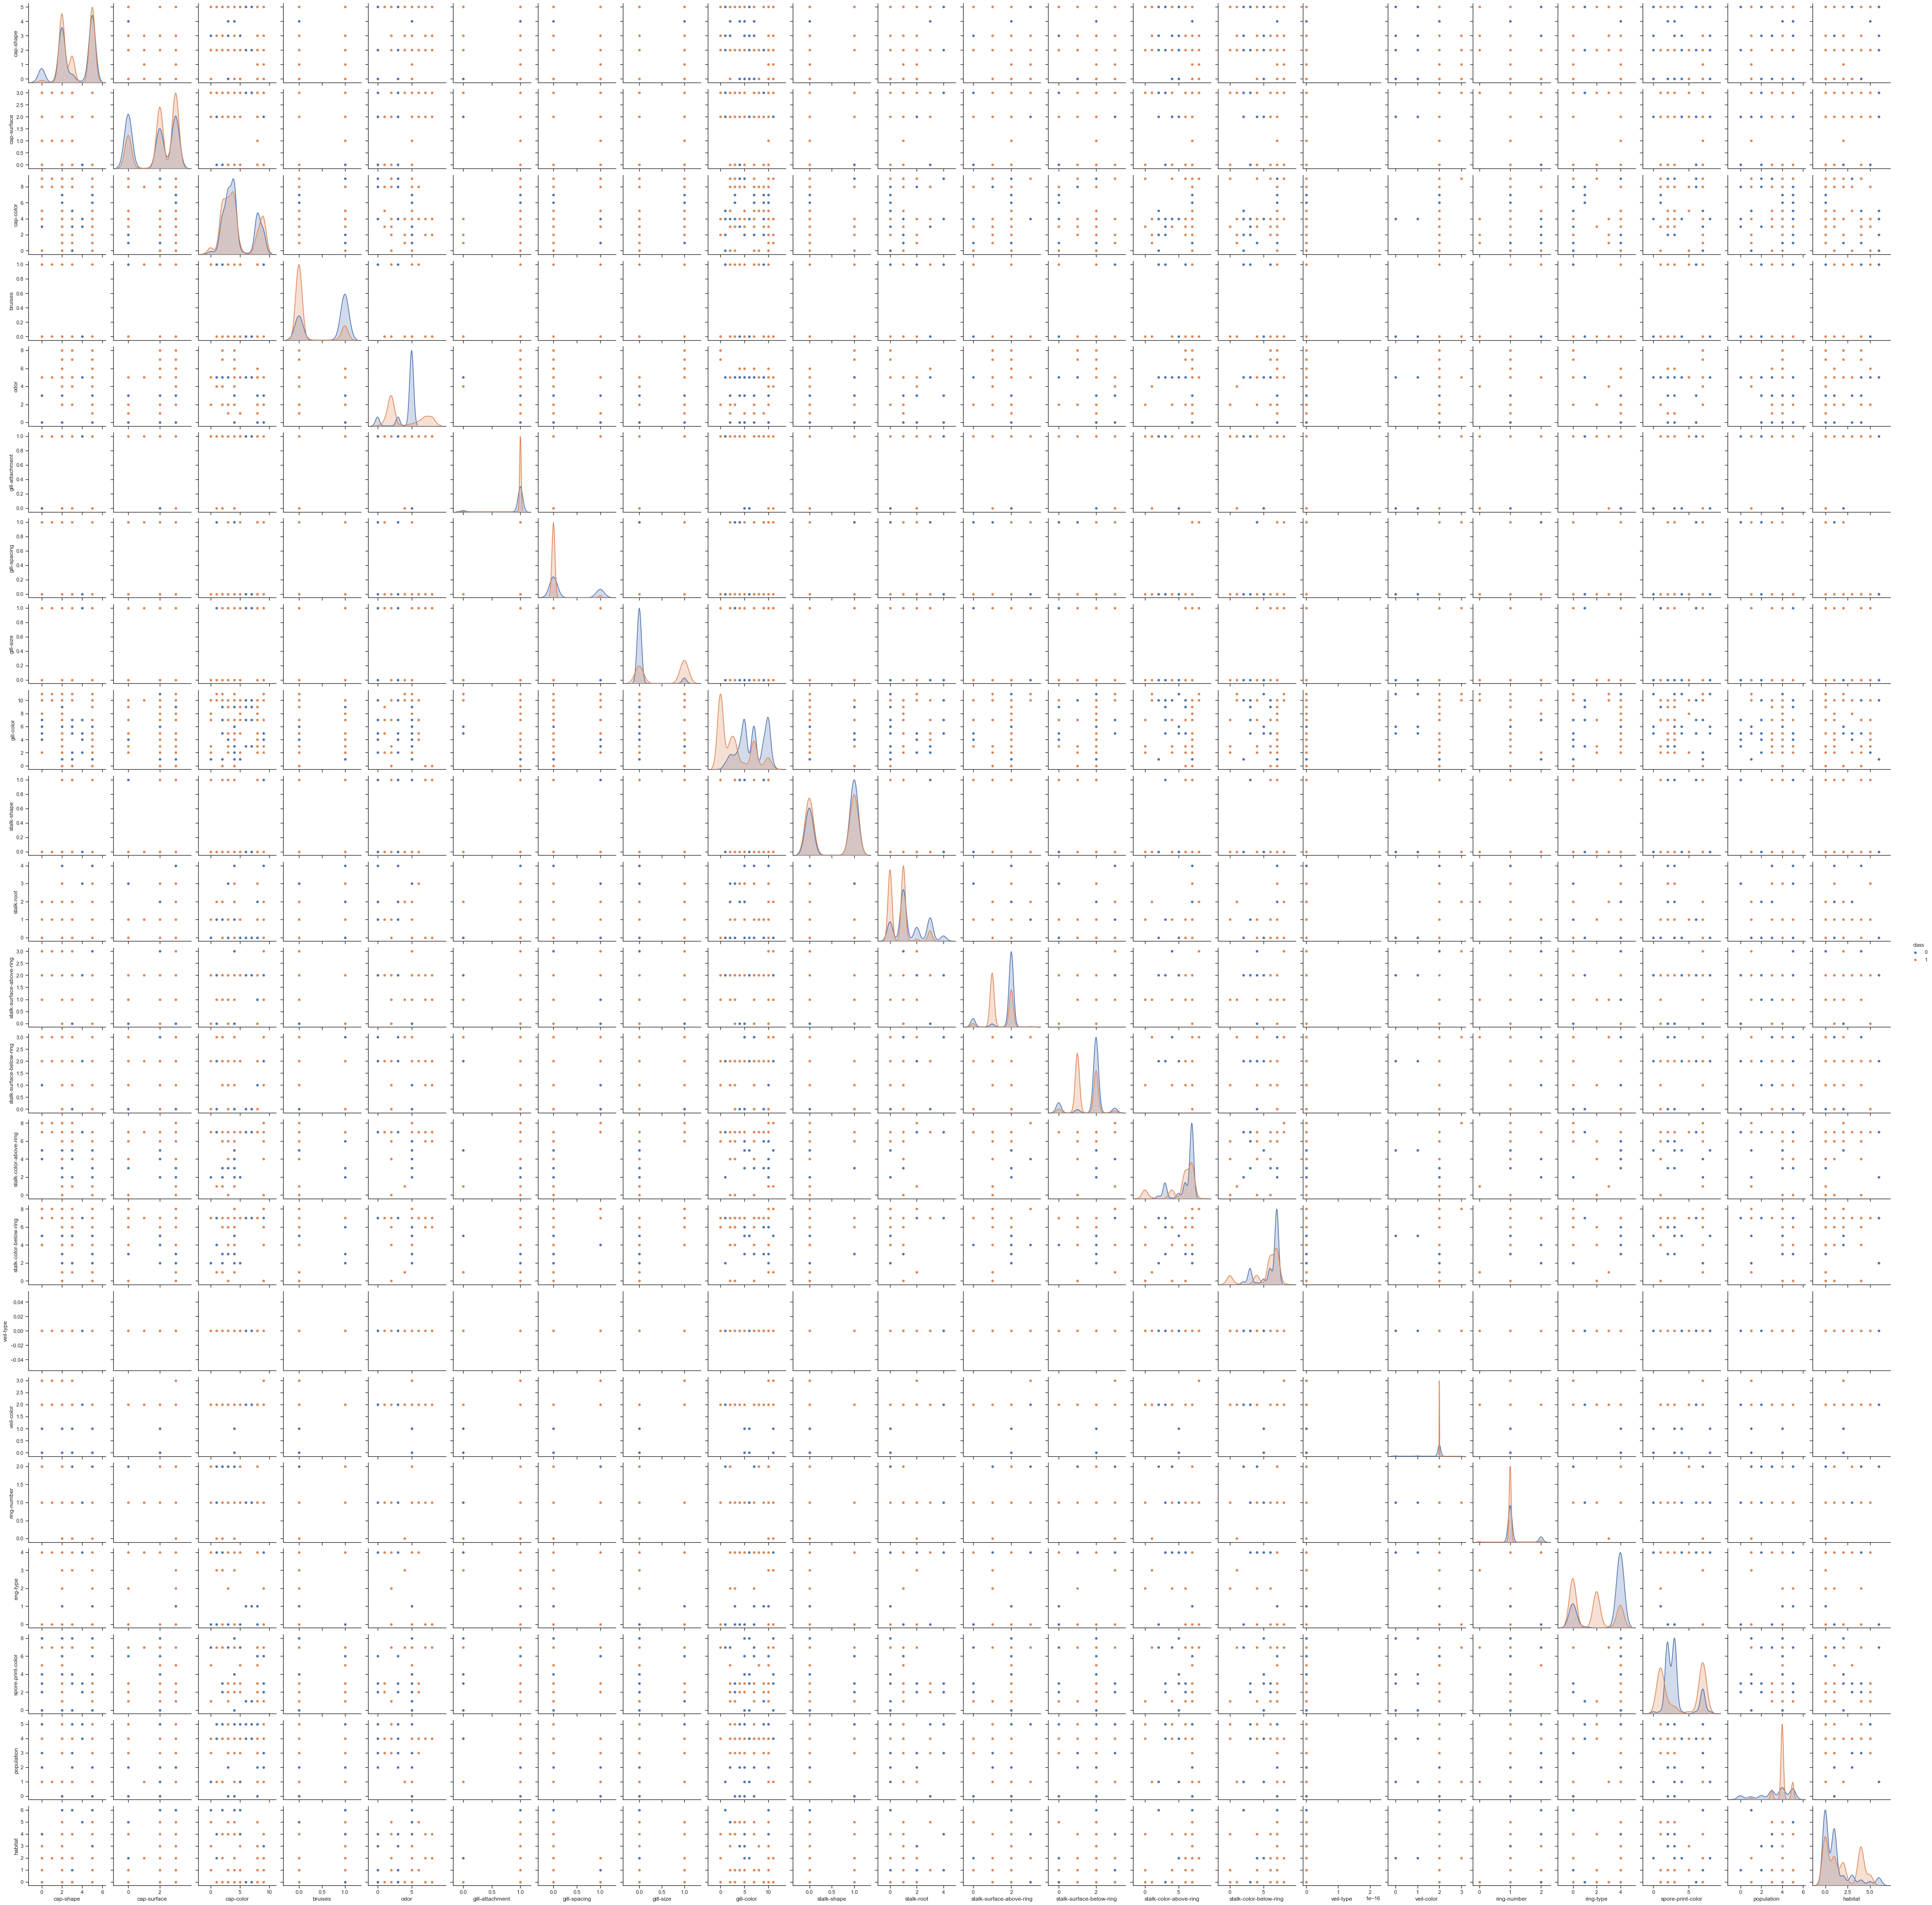

In [53]:
# закомментить во имя жизни компа
sns.pairplot(mushrooms, hue = 'class')

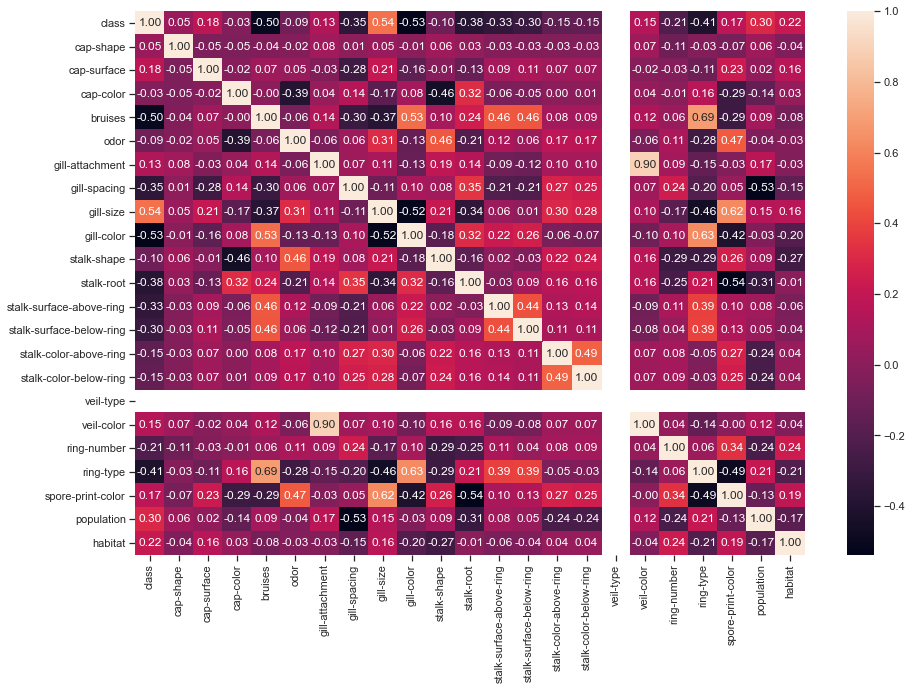

In [54]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(mushrooms.corr(method='pearson'), annot=True, fmt='.2f')

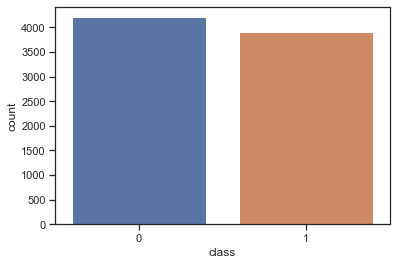

In [55]:
sns.countplot(mushrooms['class'])

### Разбиение данных на выборки

In [56]:
#Подготовка данных
X = mushrooms.drop('class', axis = 1)
y = mushrooms['class']
#Разделение набора данных на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
#Применение стандартного масштабирования для оптимизации результата 
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [57]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [58]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Оценка моделей

In [59]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Normalized confusion matrix


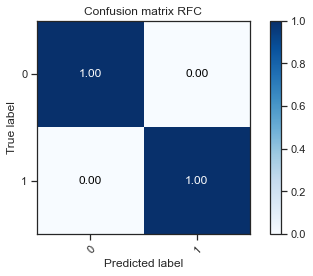

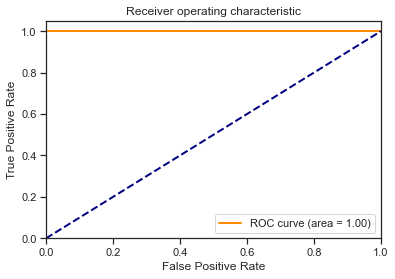

1.0

In [60]:
#Оценим результат работы нашей модели
#RandomForest
plot_confusion_matrix(y_test, pred_rfc, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix RFC')
draw_roc_curve(y_test.values, pred_rfc)
balanced_accuracy_score(y_test, pred_rfc)

In [61]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

Normalized confusion matrix


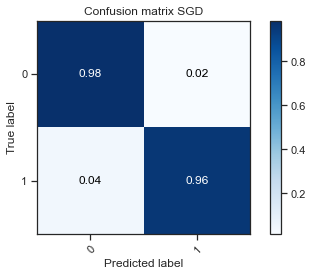

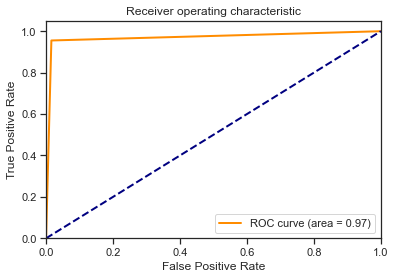

0.9697129222845023

In [62]:
#Оценим результат работы нашей модели
#Стохастический градиентный спуск
plot_confusion_matrix(y_test, pred_sgd, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SGD')
draw_roc_curve(y_test.values, pred_sgd)
balanced_accuracy_score(y_test, pred_sgd)

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

Normalized confusion matrix


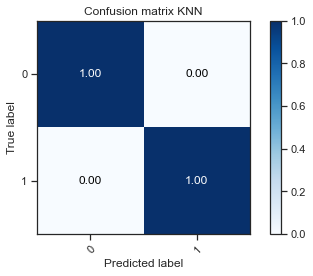

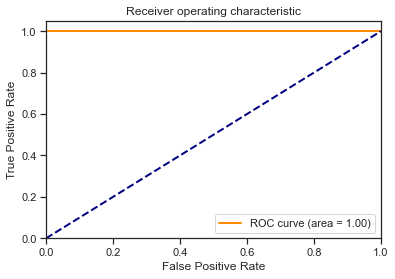

1.0

In [64]:
#Оценим результат работы нашей модели
#Ближайшие соседи
plot_confusion_matrix(y_test, pred_knn, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix KNN')
draw_roc_curve(y_test.values, pred_knn)
balanced_accuracy_score(y_test, pred_knn)

In [65]:
gbs = GradientBoostingClassifier()
gbs.fit(X_train, y_train)
pred_gbs = gbs.predict(X_test)

Normalized confusion matrix


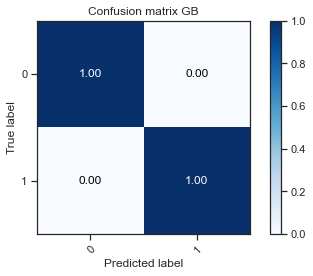

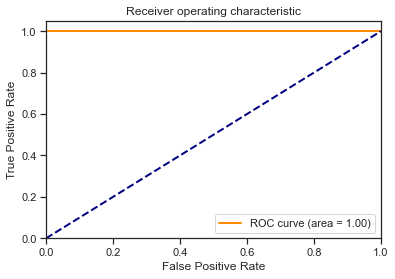

1.0

In [66]:
#Оценим результат работы нашей модели
#Градиентный бустинг
plot_confusion_matrix(y_test, pred_gbs, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix GB')
draw_roc_curve(y_test.values, pred_gbs)
balanced_accuracy_score(y_test, pred_gbs)

In [67]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

Normalized confusion matrix


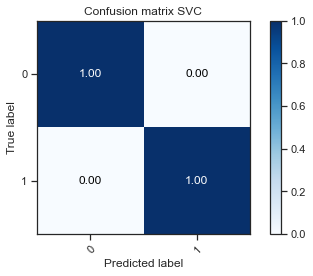

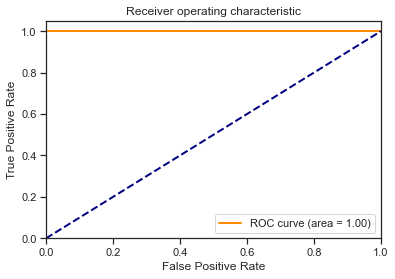

1.0

In [68]:
#Оценим результат работы нашей модели
#Метод опорных векторов
plot_confusion_matrix(y_test, pred_svc, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SVC')
draw_roc_curve(y_test.values, pred_svc)
balanced_accuracy_score(y_test, pred_svc)

### SVC

In [69]:
#Поиск оптимальных параметров для модели SVC
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='balanced_accuracy', cv=3)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [70]:
#Лучшие параметры для модели SVC
grid_svc.best_params_

{'C': 0.8, 'gamma': 0.9, 'kernel': 'rbf'}

Normalized confusion matrix


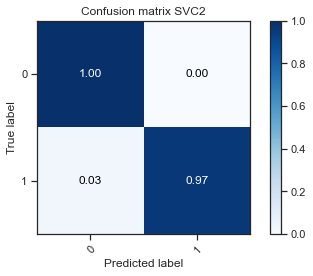

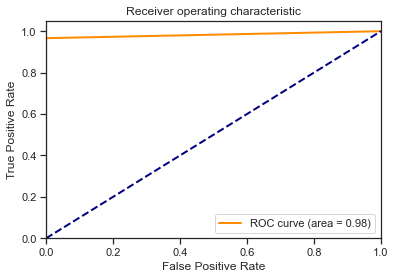

0.9832298136645963

In [71]:
# Вновь запустим наш SVC с лучшими параметрами
svc2 = SVC(C = 1.2, gamma =  0.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
plot_confusion_matrix(y_test, pred_svc2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SVC2')
draw_roc_curve(y_test.values, pred_svc2)
balanced_accuracy_score(y_test, pred_svc2)

### KNN

In [72]:
n_range = np.array(range(1,100,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
         86, 91, 96])}]

In [73]:
grid_knn = GridSearchCV(knn, tuned_parameters, cv=3, scoring='balanced_accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [74]:
#Лучшие параметры для модели KNN
grid_knn.best_params_

{'n_neighbors': 1}

Normalized confusion matrix


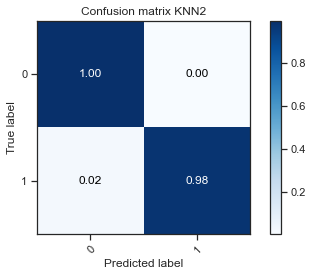

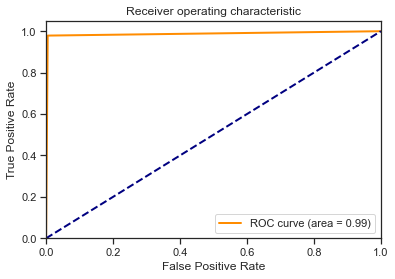

0.987001969398576

In [75]:
# Вновь запустим наш KNN с лучшими параметрами
knn2 = KNeighborsClassifier(n_neighbors=71)
knn2.fit(X_train, y_train)
pred_knn2 = knn2.predict(X_test)
plot_confusion_matrix(y_test, pred_knn2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix KNN2')
draw_roc_curve(y_test.values, pred_knn2)
balanced_accuracy_score(y_test, pred_knn2)

### GBS

In [76]:
param_gbs = {'n_estimators':[1, 3, 5, 7, 10, 13, 16], 
                            'max_depth':[1, 3, 5, 7, 10, 13, 16],
                            'learning_rate':[0.01, 0.05, 0.1, 0.5, 2, 3, 4, 5]}
grid_gbs = GridSearchCV(gbs, param_gbs, scoring='balanced_accuracy', cv=3)
grid_gbs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [77]:
#Лучшие параметры для модели GB
grid_gbs.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 5}

Normalized confusion matrix


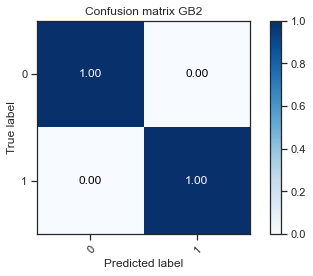

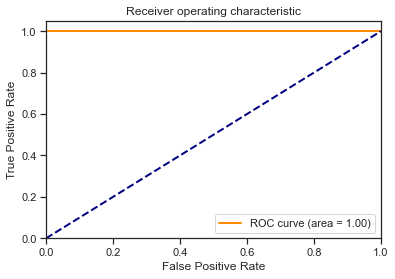

1.0

In [78]:
# Вновь запустим наш GB с лучшими параметрами
gbs2 = GradientBoostingClassifier(n_estimators=16, max_depth=10, learning_rate=0.5)
gbs2.fit(X_train, y_train)
pred_gbs2 = gbs2.predict(X_test)
plot_confusion_matrix(y_test, pred_gbs2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix GB2')
draw_roc_curve(y_test.values, pred_gbs2)
balanced_accuracy_score(y_test, pred_gbs2)

### SGD

In [79]:
param_sgd = {'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]}
grid_sgd = GridSearchCV(sgd, param_sgd, cv=3, scoring='balanced_accuracy')
grid_sgd.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty=None, power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [80]:
#Лучшие параметры для модели SGD
grid_sgd.best_params_

{'alpha': 0.1}

Normalized confusion matrix


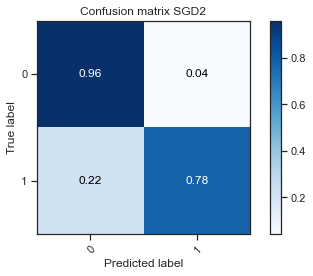

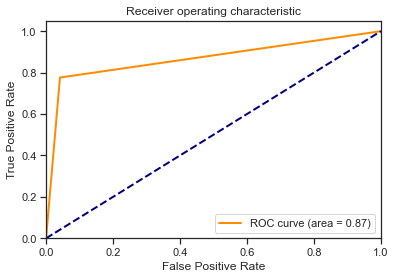

0.867467050446902

In [81]:
# Вновь запустим наш SGD с лучшими параметрами
sgd2 = SGDClassifier(alpha=0.4)
sgd2.fit(X_train, y_train)
pred_sgd2 = sgd2.predict(X_test)
plot_confusion_matrix(y_test, pred_sgd2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SGD2')
draw_roc_curve(y_test.values, pred_sgd2)
balanced_accuracy_score(y_test, pred_sgd2)

### RFC

In [82]:
param_rfc = {'n_estimators':[1, 3, 5, 7, 10, 13, 16, 19],
    'max_depth':[1, 3, 5, 7, 10, 13, 16, 19],
    'random_state':[0, 2, 4, 6, 8, 10, 12, 14]} 
grid_rfc = GridSearchCV(rfc, param_rfc, cv=3, scoring='balanced_accuracy')
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random

In [83]:
#Лучшие параметры для модели RFC
grid_rfc.best_params_

{'max_depth': 10, 'n_estimators': 3, 'random_state': 10}

Normalized confusion matrix


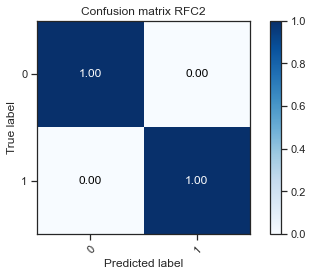

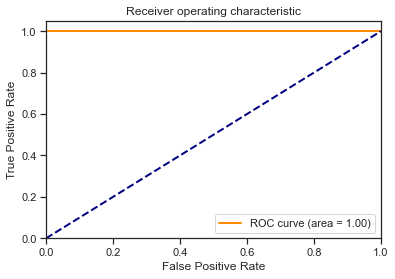

1.0

In [84]:
# Вновь запустим наш RFC с лучшими параметрами
rfc2 = RandomForestClassifier(n_estimators=19, max_depth=13, random_state=14)
rfc2.fit(X_train, y_train)
pred_rfc2 = rfc2.predict(X_test)
plot_confusion_matrix(y_test, pred_rfc2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix RFC2')
draw_roc_curve(y_test.values, pred_rfc2)
balanced_accuracy_score(y_test, pred_rfc2)